In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [2]:
#define a wrangle function
def wrangle(filename):
    df = pd.read_excel(filename)
    return df

#load the data
df = wrangle(r"C:\Users\user\Downloads\Survey_Data.xlsx")
print(df.shape)
df.head()

(100, 7)


,Gender,Highest Level of Education,Employment Status,Age,Daily Income,Amount Spent,Betting
0,Male,University,Part-time,26.0,1600.0,150,True
1,Male,University,Unemployed,24.0,500.0,100,True
2,Female,University,Unemployed,25.0,500.0,0,False
3,Male,University,Full-time,30.0,2000.0,300,True
4,Male,University,Part-time,26.0,1000.0,100,True


# Dataset Explanation
* The dataset contains 100 entries with 6 columns
* Gender 


In [3]:
#inspect the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      100 non-null    object 
 1   Highest Level of Education  97 non-null     object 
 2   Employment Status           100 non-null    object 
 3   Age                         99 non-null     float64
 4   Daily Income                75 non-null     float64
 5   Amount Spent                100 non-null    int64  
 6   Betting                     100 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 4.9+ KB


In [4]:
df["Betting"].value_counts(normalize=True)

Betting
True     0.79
False    0.21
Name: proportion, dtype: float64

In [5]:
#convert booean variables to numerical
df["Betting"] = df["Betting"].astype(int)
df.head()

,Gender,Highest Level of Education,Employment Status,Age,Daily Income,Amount Spent,Betting
0,Male,University,Part-time,26.0,1600.0,150,1
1,Male,University,Unemployed,24.0,500.0,100,1
2,Female,University,Unemployed,25.0,500.0,0,0
3,Male,University,Full-time,30.0,2000.0,300,1
4,Male,University,Part-time,26.0,1000.0,100,1


In [6]:
df.describe()

,Age,Daily Income,Amount Spent,Betting
count,99.000000,75.000000,100.000000,100.00000
mean,24.434343,768.000000,99.600000,0.79000
std,3.335528,446.657254,81.673407,0.40936
min,17.000000,500.000000,0.000000,0.00000
25%,23.000000,500.000000,50.000000,1.00000
50%,25.000000,500.000000,100.000000,1.00000
75%,27.000000,1000.000000,100.000000,1.00000
max,33.000000,2000.000000,500.000000,1.00000


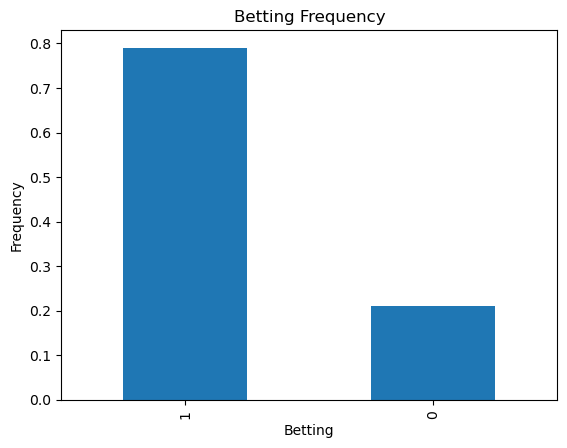

In [7]:
#inspect frequency of betting
df["Betting"].value_counts(normalize=True).plot(kind="bar", 
                                                 xlabel="Betting", ylabel="Frequency", title="Betting Frequency");

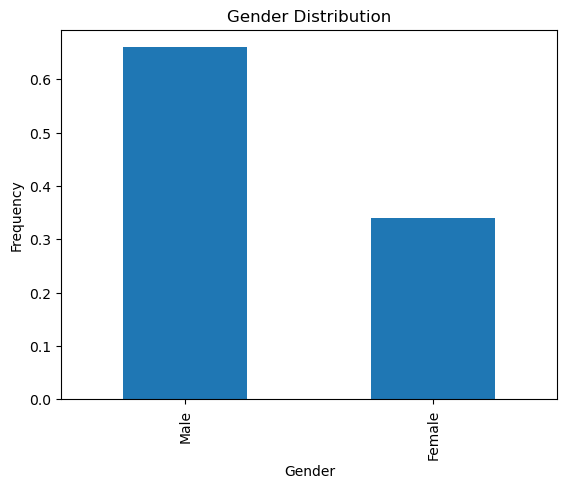

In [8]:
#inspect gender distribution
df["Gender"].value_counts(normalize=True).plot(kind="bar", 
                                                 xlabel="Gender", ylabel="Frequency", title="Gender Distribution");

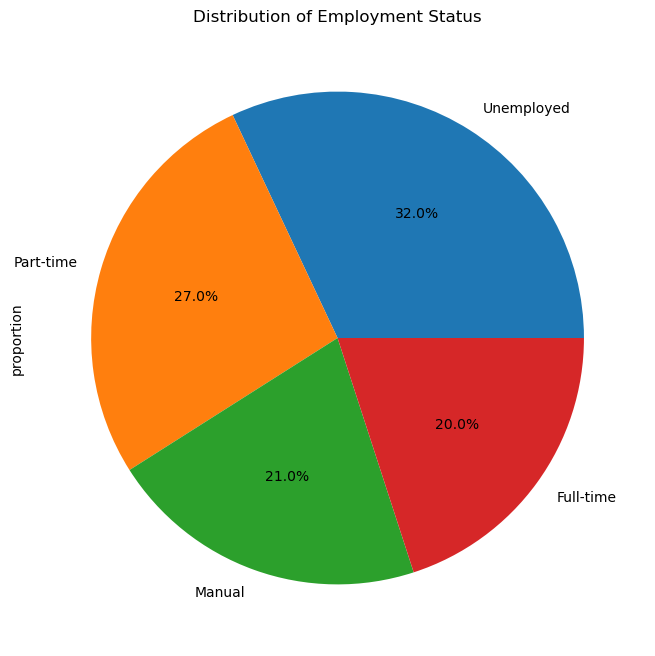

In [9]:
#Inspecting employment status by percentage
df["Employment Status"].value_counts(normalize=True).plot(kind="pie",
                                                                   autopct='%1.1f%%',  
                      title="Distribution of Employment Status",
                      figsize=(8, 8));

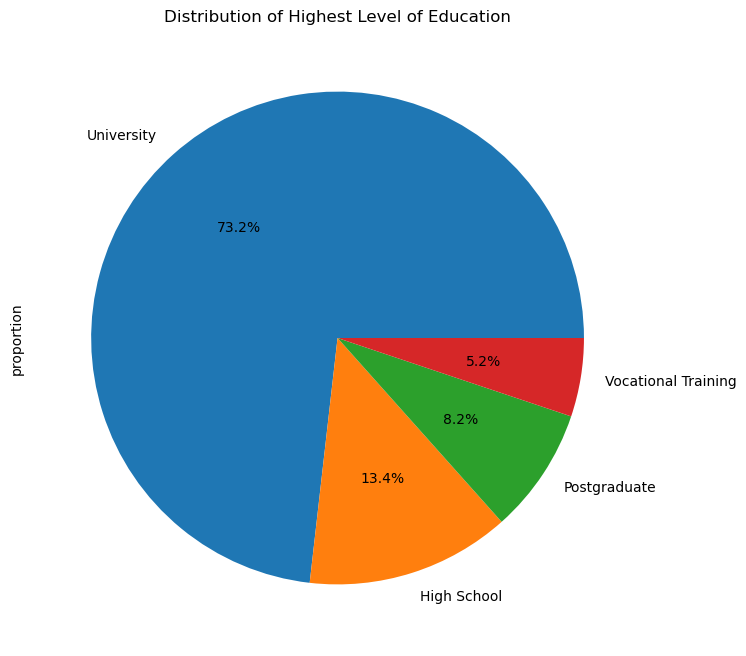

In [10]:
# Inspecting the Edu level by percentage
df["Highest Level of Education"].value_counts(normalize=True).plot(kind="pie",
                                                                   autopct='%1.1f%%',  
                      title="Distribution of Highest Level of Education",
                      figsize=(8, 8));

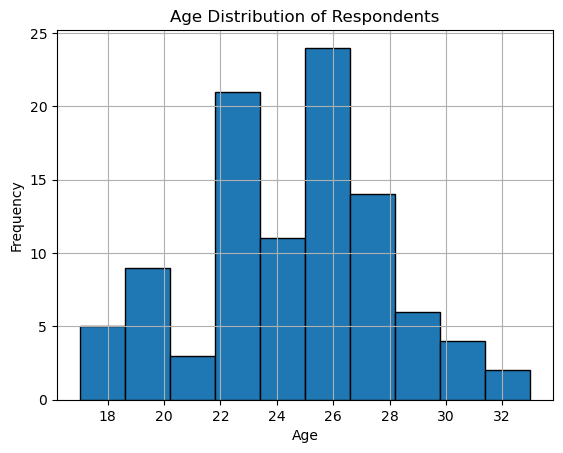

In [11]:
#Age Distribution
df['Age'].hist(bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Respondents')
plt.show()


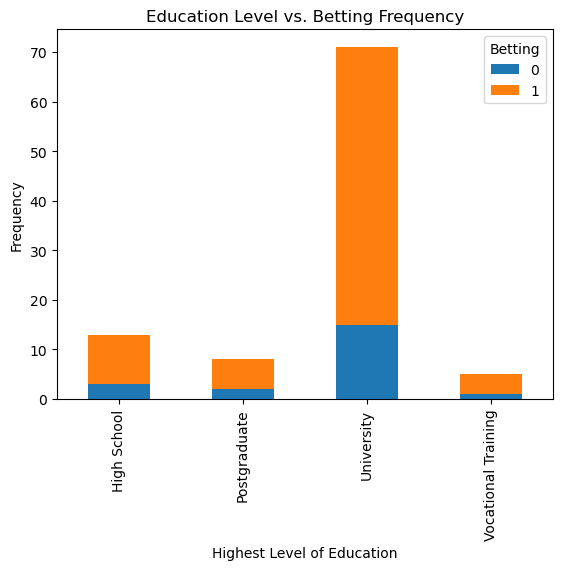

In [12]:
#Inspect education level and betting frequency
pd.crosstab(df["Highest Level of Education"], df["Betting"]).plot(kind="bar", stacked=True)
plt.xlabel("Highest Level of Education")
plt.ylabel("Frequency")
plt.title("Education Level vs. Betting Frequency")
plt.show()


In [13]:
#correlation between age and betting
corr = df[["Age", "Betting"]].corr()
corr

,Age,Betting
Age,1.000000,-0.036324
Betting,-0.036324,1.000000


In [14]:
#correlation between income and betting
corr = df[["Daily Income", "Betting"]].corr()
corr 

,Daily Income,Betting
Daily Income,1.000000,0.057807
Betting,0.057807,1.000000


In [16]:
#correlation between income and amount spent on betting
corr = df[["Daily Income", "Amount Spent"]].corr()
corr 

,Daily Income,Amount Spent
Daily Income,1.000000,0.485958
Amount Spent,0.485958,1.000000
